# LeadInsight Analyser: Painting the Story of Lead Engagements

### Importing Required Libraries

In [49]:
# For Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [120]:
df = pd.read_excel("Telemarketing.xlsx", header=2)
df.head(4)

,Timestamp,Lead Name,Lead Validation,Calling Date & Time,Picked the phone,Reason Why Phone is not picked,Email (Optional),City,Lead Interested or Not,Insert Meeting Date & Time Slot,Please state the major highlights of the call.,Select the Reason
0,2019/11/30 11:59:05 AM GMT+5:30,Naveen Garg,Valid Contact,2019-11-30 10:20:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all read used solar
1,2019/11/23 7:33:23 PM GMT+5:30,Harish,Valid Contact,2019-11-23 12:10:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all ready solar used
2,2019/11/11 4:27:04 PM GMT+5:30,Shubh Hospital,Valid Contact,2019-11-11 16:20:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used
3,2019/11/11 4:12:52 PM GMT+5:30,Rukmani Birla Hospital CK Birla,Valid Contact,2019-11-11 15:24:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used solar


In [121]:
df.shape

(1570, 12)

In [122]:
df.dtypes

Timestamp                                                 object
Lead Name                                                 object
Lead Validation                                           object
Calling Date & Time                               datetime64[ns]
Picked the phone                                          object
Reason Why Phone is not picked                            object
Email (Optional)                                          object
City                                                      object
Lead Interested or Not                                    object
Insert Meeting Date & Time Slot                   datetime64[ns]
Please state the major highlights of the call.            object
Select the Reason                                         object
dtype: object

In [123]:
pred_cols = df.columns.to_list()

In [124]:
fill_rate_df = pd.DataFrame(df[pred_cols].count()/df.shape[0]*100, columns=['fill_rate'])
fill_rate_df

,fill_rate
Timestamp,100.000000
Lead Name,100.000000
Lead Validation,100.000000
Calling Date & Time,96.624204
Picked the phone,96.624204
Reason Why Phone is not picked,35.923567
Email (Optional),0.254777
City,100.000000
Lead Interested or Not,46.751592
Insert Meeting Date & Time Slot,4.840764


**Learnings**
- `Email` feature has the lowest fill rate, which is 0.25%
- `Lead Name` is has all unique values and would not be of much contribution in the analysis
- Took `Lead Interested` and `Insert Meeting Date & Time Slot` as the target feature to base the analysis on. Considering that, the dataset seems extremely imbalanced.

First Approach:
1. Check if the `Timestamp` = `Calling Date & Time`, if so, use either. Since, `Calling Date & Time` has lower fill rate than `Timestamp`, we can just use `Timestamp` instead.
2. Cols will not be used for EDA:  `Email`, `Lead Name`, `Please state the major highlights of the call.`

In [125]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: date_time[:-9])
df['Timestamp']

0       2019/11/30 11:59:05 AM
1        2019/11/23 7:33:23 PM
2        2019/11/11 4:27:04 PM
3        2019/11/11 4:12:52 PM
4        2019/11/11 4:25:38 PM
                 ...          
1565     2019/11/30 7:37:02 PM
1566     2019/11/30 7:39:36 PM
1567     2019/11/30 7:41:09 PM
1568     2019/11/30 7:43:11 PM
1569     2019/11/30 7:48:31 PM
Name: Timestamp, Length: 1570, dtype: object

In [126]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: dt.strptime(date_time, '%Y/%m/%d %I:%M:%S %p'))
df['Timestamp']

0      2019-11-30 11:59:05
1      2019-11-23 19:33:23
2      2019-11-11 16:27:04
3      2019-11-11 16:12:52
4      2019-11-11 16:25:38
               ...        
1565   2019-11-30 19:37:02
1566   2019-11-30 19:39:36
1567   2019-11-30 19:41:09
1568   2019-11-30 19:43:11
1569   2019-11-30 19:48:31
Name: Timestamp, Length: 1570, dtype: datetime64[ns]

In [127]:
df['Date'] = df['Timestamp'].dt.date
df['Date']

0       2019-11-30
1       2019-11-23
2       2019-11-11
3       2019-11-11
4       2019-11-11
           ...    
1565    2019-11-30
1566    2019-11-30
1567    2019-11-30
1568    2019-11-30
1569    2019-11-30
Name: Date, Length: 1570, dtype: object

In [128]:
df['Time'] = df['Timestamp'].dt.time
df['Time']

0       11:59:05
1       19:33:23
2       16:27:04
3       16:12:52
4       16:25:38
          ...   
1565    19:37:02
1566    19:39:36
1567    19:41:09
1568    19:43:11
1569    19:48:31
Name: Time, Length: 1570, dtype: object

Univariate Analysis:
1. Out of the contact list we have, how many contacts are valid?
2. What % of the contact list picked up the call?
3. Top reasons of not picking up the call and there %
4. What % of lead is interested in solar panels
5. Meeting conversion rate

In [129]:
df['Lead Validation'] = np.where((df['Lead Validation']=='Valid Contact'), 1, 0)

In [143]:
valid_lead_df = df['Lead Validation'].value_counts(normalize=True).reset_index().rename(columns={'index':'valid_lead', 'Lead Validation': 'ratio'})
valid_lead_df

,valid_lead,ratio
0,1,0.966242
1,0,0.033758


In [144]:
# sns.set_palette("pastel")
# plt.pie(valid_lead_df['ratio'], labels=valid_lead_df['valid_lead'], autopct='%1.1f%%', startangle=90)
# plt.title('Pie Chart for Valid Lead Ratio')
# plt.show()

In [145]:
df['Picked the phone'] = np.where((df['Picked the phone']=='Yes'), 1, 0)

In [147]:
picked_phone_df = df['Picked the phone'].value_counts(normalize=True).reset_index().rename(columns={'index':'phone_picked'
                                                                                                    , 'Picked the phone': 'ratio'})
picked_phone_df

,phone_picked,ratio
0,0,0.530573
1,1,0.469427


In [154]:
df['Reason Why Phone is not picked'].value_counts(normalize=True, dropna=False)

NaN                            0.640764
Unknown                        0.183439
Not reachable at the moment    0.067516
Busy, on another call          0.064331
Switch-Off                     0.033121
Temporarily Out of Service     0.009554
not pickup the call            0.001274
Name: Reason Why Phone is not picked, dtype: float64

In [151]:
df['Reason Why Phone is not picked'] = np.where(
    (df['Reason Why Phone is not picked'] == 'Not Picked the Call') | 
    (df['Reason Why Phone is not picked'] == 'not pickup the call'), 
    'Unknown', 
    df['Reason Why Phone is not picked']
)


In [152]:
df['Reason Why Phone is not picked']

0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
                   ...             
1565                            NaN
1566                            NaN
1567                        Unknown
1568                     Switch-Off
1569    Not reachable at the moment
Name: Reason Why Phone is not picked, Length: 1570, dtype: object

Bivariate & Multivariate Analysis
1. Trend between weekdays/weekends v/s calls picked
2. Trend between weekdays/weekends v/s customer interested or not
3. Is there a time factor that might lead to customer confirming a meeting?

In [4]:
## Changing the names of the columns in the data to desired values

names=[]
columns=data.iloc[1]
for i in columns:
    names.append(i)
    
data = pd.read_excel("C:/Users/Sukriti Macker/All Internship Works/Peacock Solar/Peacock Solar Data Analytics Intern/Telemarketing.xlsx", names=names)

### Data Manipulation

In [5]:
data.drop(labels=[0,1],axis=0,inplace=True)  # Dropping Unnamed Columns 

In [6]:
data.reset_index(drop=True,inplace=True)  # Reseting the Index Values

In [7]:
data.head(4)

,Timestamp,Lead Name,Lead Validation,Calling Date & Time,Picked the phone,Reason Why Phone is not picked,Email (Optional),City,Lead Interested or Not,Insert Meeting Date & Time Slot,Please state the major highlights of the call.,Select the Reason
0,2019/11/30 11:59:05 AM GMT+5:30,Naveen Garg,Valid Contact,2019-11-30 10:20:00,Yes,NaN,NaN,Kota,No,NaN,NaN,all read used solar
1,2019/11/23 7:33:23 PM GMT+5:30,Harish,Valid Contact,2019-11-23 12:10:00,Yes,NaN,NaN,Kota,No,NaN,NaN,all ready solar used
2,2019/11/11 4:27:04 PM GMT+5:30,Shubh Hospital,Valid Contact,2019-11-11 16:20:00,Yes,NaN,NaN,Jaipur,No,NaN,NaN,all ready used
3,2019/11/11 4:12:52 PM GMT+5:30,Rukmani Birla Hospital CK Birla,Valid Contact,2019-11-11 15:24:00,Yes,NaN,NaN,Jaipur,No,NaN,NaN,all ready used solar


#### Analyzing the Data for NULL Values

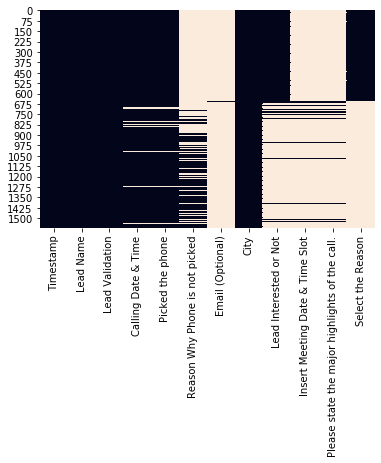

In [8]:
sns.heatmap(data.isnull(), cbar = False)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Timestamp                                       1570 non-null   object
 1   Lead Name                                       1570 non-null   object
 2   Lead Validation                                 1570 non-null   object
 3   Calling Date & Time                             1517 non-null   object
 4   Picked the phone                                1517 non-null   object
 5   Reason Why Phone is not picked                  564 non-null    object
 6   Email (Optional)                                4 non-null      object
 7   City                                            1570 non-null   object
 8   Lead Interested or Not                          734 non-null    object
 9   Insert Meeting Date & Time Slot                 76 n

In [101]:
## Dropping the Columns that have nearly null or null values

data.drop(labels=['Timestamp',"Reason Why Phone is not picked",'Lead Name','Lead Validation','Picked the phone','Email (Optional)','Insert Meeting Date & Time Slot','Please state the major highlights of the call.'],axis=1,inplace=True)
data

,Calling Date & Time,City,Lead Interested or Not,Select the Reason
0,2019-11-30 10:20:00,Kota,No,all read used solar
1,2019-11-23 12:10:00,Kota,No,all ready solar used
2,2019-11-11 16:20:00,Jaipur,No,all ready used
3,2019-11-11 15:24:00,Jaipur,No,all ready used solar
4,2019-11-11 16:00:00,Jaipur,No,all ready used solar
...,...,...,...,...
1565,2019-11-30 14:23:00,Kota,NaN,NaN
1566,2019-11-30 15:12:00,Kota,Yes,NaN
1567,2019-11-30 15:12:00,Kota,NaN,NaN
1568,2019-11-30 16:12:00,Kota,NaN,NaN


#### Filling NA or NULL values using Mean, Median or Mode

In [102]:
#data.dropna(subset = ["Calling Date & Time","City","Lead Interested or Not","Select the Reason"], inplace=True ,axis=1)
data["Lead Interested or Not"]=data["Lead Interested or Not"].fillna(data["Lead Interested or Not"].mode()[0])
data["Calling Date & Time"]=data["Calling Date & Time"].fillna(data["Calling Date & Time"].mode()[0])
data["City"]=data["City"].fillna(data["City"].mode()[0])
data["Select the Reason"]=data["Select the Reason"].fillna(data["Select the Reason"].mode()[0])
data

,Calling Date & Time,City,Lead Interested or Not,Select the Reason
0,2019-11-30 10:20:00,Kota,No,all read used solar
1,2019-11-23 12:10:00,Kota,No,all ready solar used
2,2019-11-11 16:20:00,Jaipur,No,all ready used
3,2019-11-11 15:24:00,Jaipur,No,all ready used solar
4,2019-11-11 16:00:00,Jaipur,No,all ready used solar
...,...,...,...,...
1565,2019-11-30 14:23:00,Kota,No,Reason not given by Customer
1566,2019-11-30 15:12:00,Kota,Yes,Reason not given by Customer
1567,2019-11-30 15:12:00,Kota,No,Reason not given by Customer
1568,2019-11-30 16:12:00,Kota,No,Reason not given by Customer


#### Observing the values of the columns reamaining

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Calling Date & Time     1570 non-null   datetime64[ns]
 1   City                    1570 non-null   object        
 2   Lead Interested or Not  1570 non-null   object        
 3   Select the Reason       1570 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 49.2+ KB


In [104]:
data

,Calling Date & Time,City,Lead Interested or Not,Select the Reason
0,2019-11-30 10:20:00,Kota,No,all read used solar
1,2019-11-23 12:10:00,Kota,No,all ready solar used
2,2019-11-11 16:20:00,Jaipur,No,all ready used
3,2019-11-11 15:24:00,Jaipur,No,all ready used solar
4,2019-11-11 16:00:00,Jaipur,No,all ready used solar
...,...,...,...,...
1565,2019-11-30 14:23:00,Kota,No,Reason not given by Customer
1566,2019-11-30 15:12:00,Kota,Yes,Reason not given by Customer
1567,2019-11-30 15:12:00,Kota,No,Reason not given by Customer
1568,2019-11-30 16:12:00,Kota,No,Reason not given by Customer


In [105]:
#data.to_excel("Telemarketing data.xlsx")

## Separating the data wherein the customer is a potential lead or not

#### Based On City

In [106]:
city_list=data['City'].to_list()
city=tuple(city_list)
city

('Kota',
 'Kota',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Kota',
 'Kota',
 'Indore',
 'Jaipur',
 'Jaipur',
 'Kota',
 'Kota',
 'Jaipur',
 'Indore',
 'Kota',
 'Jaipur',
 'Kota',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Jaipur',
 'Indore',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Kota',
 'Kota',
 'Kota',
 'Kota',
 'Kota',
 'Kota',
 'Indore',
 'Jaipur',
 'Indore',
 'Jaipur',
 'Jaipur',
 'Kota',
 'Indore',
 'Indore',
 'Jaipur',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indore',
 'Indor

In [107]:
lead_list=data['Lead Interested or Not'].to_list()
lead=tuple(lead_list)
lead

('No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',

In [108]:
nos={}
yes={}


for i,j in zip(city,lead):
    if j=='No':
        if i in nos:
            nos[i]+=1
        else:
            nos[i]=1
            
    if j=='Yes':
        if i in yes:
            yes[i]+=1
        else:
            yes[i]=1

In [109]:
yes

{'Indore': 42, 'Other': 2, 'Kota': 15, 'Jaipur': 17}

In [110]:
nos

{'Kota': 304, 'Jaipur': 691, 'Indore': 499}

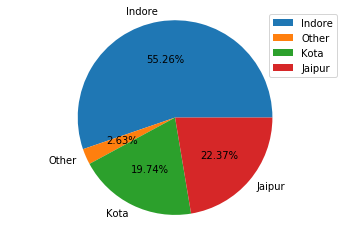

In [113]:
#pie chart for yes values
sizes=yes.values()
labels=yes.keys()
plt.pie(sizes,labels=labels,autopct="%.2f%%")
plt.axis("equal")
plt.legend(loc="upper right",bbox_to_anchor=(1,1))
plt.show()

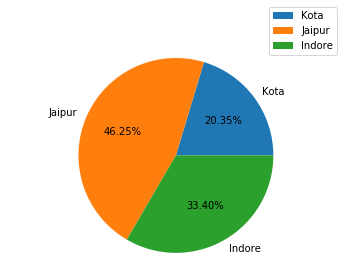

In [114]:
#pie chart for nos values
sizes=nos.values()
labels=nos.keys()
plt.pie(sizes,labels=labels,autopct="%.2f%%")
plt.axis("equal")
plt.legend(loc="upper right",bbox_to_anchor=(1,1.2))
plt.show()

#### Based On Calling Time of the Executive to the Customer

In [115]:
#splitting call date and time
def f(date_time):
    
    hours = date_time.strftime('%H')
    minutes = date_time.strftime('%M')
    time=hours+minutes
    return(int(time))
    
    
data['Call Time']=data['Calling Date & Time'].apply(f)
data['Call Time']

0       1020
1       1210
2       1620
3       1524
4       1600
        ... 
1565    1423
1566    1512
1567    1512
1568    1612
1569    1532
Name: Call Time, Length: 1570, dtype: int64

In [116]:
t_list=data['Call Time'].to_list()
t_tuple=tuple(t_list)

timeNo={}
timeYes={}

for i,j in zip(t_tuple,lead):
    if j=='No':
        if i in timeNo:
            timeNo[i]+=1
        else:
            timeNo[i]=1
            
    if j=='Yes':
        if i in timeYes:
            timeYes[i]+=1
        else:
            timeYes[i]=1

In [117]:
##TWO HOURS SLOTS
#slot 1-> 10-12
#slot 2-> 12-2
#slot 3-> 2-4
#slot 4-> 4-6

slot1=[]
slot2=[]
slot3=[]
slot4=[]

slot1Y=[]
slot2Y=[]
slot3Y=[]
slot4Y=[]

#FOR NOS:-
for i in timeNo.keys():
    if i<=1200 and i>=1000:
        slot1.append(timeNo[i])
        
    elif i<=1400 and i>=1201:
        slot2.append(timeNo[i])
        
    elif i<=1600 and i>=1401:
        slot3.append(timeNo[i])
        
    elif i<=1800 and i>=1601:
        slot4.append(timeNo[i])
        
        
#FOR YES:-
for i in timeYes.keys():
    if i<=1200 and i>=1000:
        slot1Y.append(timeYes[i])
        
    elif i<=1400 and i>=1201:
        slot2Y.append(timeYes[i])
        
    elif i<=1600 and i>=1401:
        slot3Y.append(timeYes[i])
        
    elif i<=1800 and i>=1601:
        slot4Y.append(timeYes[i])

In [118]:
x1=sum(slot1)
x2=sum(slot2)
x3=sum(slot3)
x4=sum(slot4)

no_list_sum_slotwise=[x1,x2,x3,x4]

x1Y=sum(slot1Y)
x2Y=sum(slot2Y)
x3Y=sum(slot3Y)
x4Y=sum(slot4Y)

yes_list_sum_slotwise=[x1Y,x2Y,x3Y,x4Y]

In [119]:
no_of_timeslots=np.arange(0,4,1)

In [120]:
slot_list=["Slot1(10pm-12pm)","Slot2(12pm-2pm)","Slot3(2pm-4pm)","Slot4(4pm-6pm)"]

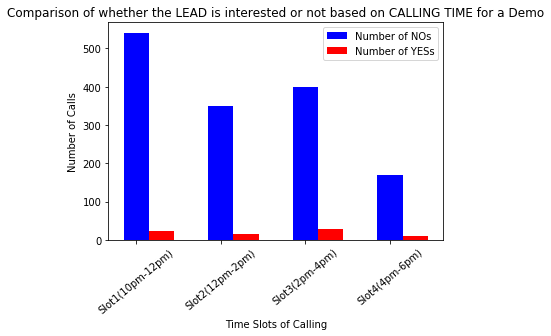

In [121]:
plt.xlabel("Time Slots of Calling")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.bar(no_of_timeslots,no_list_sum_slotwise,width=0.3, color="blue",label="Number of NOs")
plt.bar(no_of_timeslots+0.3,yes_list_sum_slotwise,width=0.3,color="red",label="Number of YESs")
plt.legend()
plt.title("Comparison of whether the LEAD is interested or not based on CALLING TIME for a Demo")
plt.show()

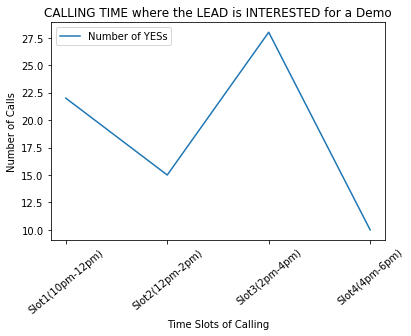

In [122]:
plt.plot(no_of_timeslots,yes_list_sum_slotwise,label="Number of YESs")
plt.xlabel("Time Slots of Calling")
plt.title("CALLING TIME where the LEAD is INTERESTED for a Demo")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.legend()
plt.show()

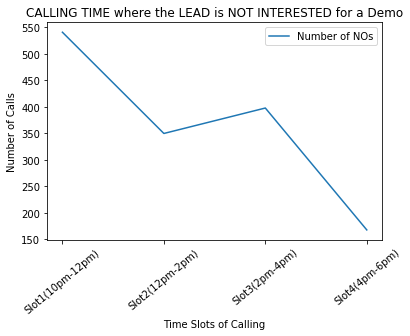

In [123]:
plt.plot(no_of_timeslots,no_list_sum_slotwise,label="Number of NOs")
plt.xlabel("Time Slots of Calling")
plt.title("CALLING TIME where the LEAD is NOT INTERESTED for a Demo")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.legend()
plt.show()

#### Based On Reasons Given By the Customers

In [124]:
def r(var):
    if "used" in var:
        return var.replace(var,"Already Using Solar")
    elif "rent" in var:
        return var.replace(var,"Rented Property")
    elif "rented" in var:
        return var.replace(var,"Rented Property")
    elif "Rent" in var:
        return var.replace(var,"Rented Property")
    elif "Rented" in var:
        return var.replace(var,"Rented Property")
    elif "call" in var:
        return var.replace(var,"Interested, but later")
    elif "money" in var:
        return var.replace(var,"High cost of Solar Power Systems")
    else:
        return var

In [125]:
data['Reasons']=data['Select the Reason'].apply(r)

In [126]:
reason_list=data['Reasons'].to_list()
reasons=tuple(reason_list)

In [127]:
reason_for_no={}
reason_for_yes={}

In [128]:
for i,j in zip(reasons,lead):
    
    if j=="No":
        if i in reason_for_no:
            reason_for_no[i]+=1
        else:
            reason_for_no[i]=1


    elif j=="Yes":
        if i in reason_for_yes:
            reason_for_yes[i]+=1
        else:
            reason_for_yes[i]=1

In [129]:
misc=0
for i in list(reason_for_no):
    if reason_for_no[i]<=1:
        misc+=1
        reason_for_no.pop(i)
reason_for_no['Miscellaneous Reasons']=misc

In [130]:
reason_for_no

{'Already Using Solar': 24,
 'Interested, but later': 16,
 'High cost of Solar Power Systems': 4,
 'Rented Property': 14,
 'Reason not given by Customer': 1432,
 'Miscellaneous Reasons': 4}

In [131]:
reason_for_yes

{'Reason not given by Customer': 76}

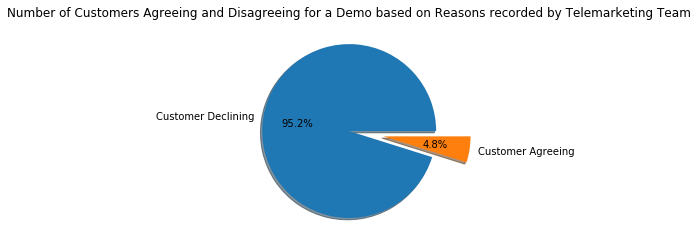

In [132]:
#Pie chart for no vs yes
no=int(sum(reason_for_no.values()))
yes=int(sum(reason_for_yes.values()))


sizes=[no,yes]
labels=["Customer Declining", "Customer Agreeing"]
plt.title("Number of Customers Agreeing and Disagreeing for a Demo based on Reasons recorded by Telemarketing Team")
explode=[0,0.4]
plt.pie(sizes,labels=labels,autopct="%.1f%%", shadow = True,explode=explode)
plt.show()

In [133]:
xaxis=np.arange(len(reason_for_no.keys()))
xaxis

array([0, 1, 2, 3, 4, 5])

In [134]:
#explode=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [135]:
#Reasons for declining
size=[]
label=[]
for i in reason_for_no.values():
    size.append(i)
    
for j in reason_for_no.keys():
    label.append(j)

In [136]:
size,label

([24, 16, 4, 14, 1432, 4],
 ['Already Using Solar',
  'Interested, but later',
  'High cost of Solar Power Systems',
  'Rented Property',
  'Reason not given by Customer',
  'Miscellaneous Reasons'])

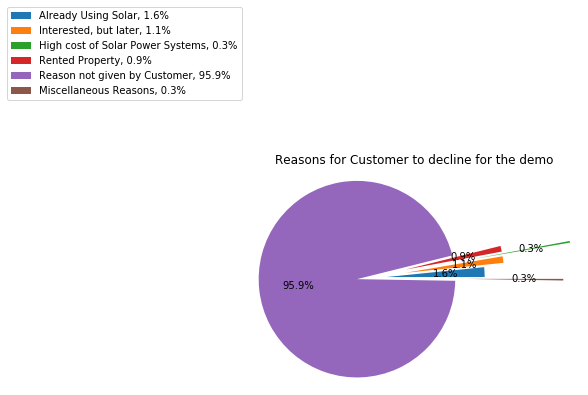

In [137]:
plt.title("Reasons for Customer to decline for the demo")

total=sum(size)



explode=[0.2,0.4,1.1,0.4,0.1,1]
colours=[]
plt.pie(size,explode=explode,autopct="%.1f%%")
plt.legend(labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(label, size)],loc="lower right",bbox_to_anchor=(0, 1.3))

plt.axis('equal')
plt.show()